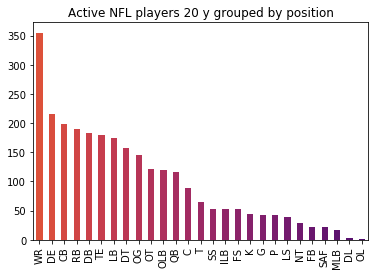

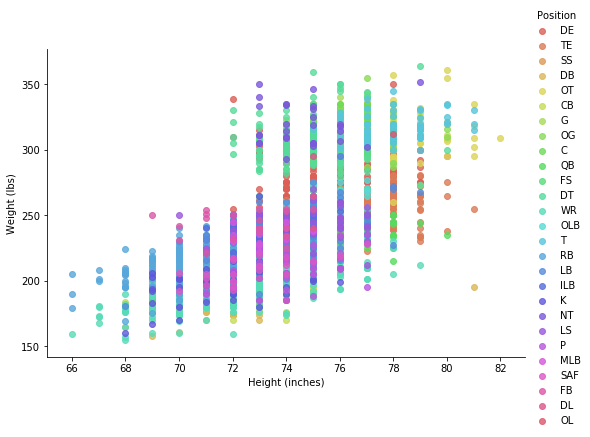

In [13]:
# Import the required libraries
import seaborn as sns
from matplotlib import cm
import numpy as np
import pandas as pd
import matplotlib.colors as colors
import matplotlib.pyplot as plt
%matplotlib inline
# Load the dataset esto es empleando pandas, no nativo de Python
data = pd.read_csv("../data/extracted/NFL/NFL.csv")
data.head(5)
list(data.columns)

# Filtering and Selecting
ageFilterValue = 20
#Age es el encabezado de una de las columnas en data
ageFilter = data["Age"] > ageFilterValue
aboveAge = data[ageFilter]
len(aboveAge)
#Currrent Satatus es otro de los encabezados del csv
data["Current Status"].unique()
activeFilter = data["Current Status"] == "Active"

aboveAndActive = data[ageFilter & activeFilter]
len(aboveAndActive)

# Plotting
frequencies = aboveAndActive["Position"].value_counts()
frequencies.plot.bar(
    title=(
        "Active players above  " +
        str(ageFilterValue) +
        "grouped by position"
    )
)

# Plotting with style
color = cm.inferno_r(np.linspace(.4, .8, 30))
#f es para dara formato a la salida
frequencies.plot(
    kind="bar",
    title=(f"Active NFL players {ageFilterValue} grouped by position"),
    color=color
)
plt.savefig('./images/nflBar.png', dpi=500)
# Scatter plot
sns.lmplot(
    x="Height (inches)", y="Weight (lbs)", data=aboveAndActive,
    aspect=1.5, fit_reg=False, hue='Position', legend=True,
    palette=sns.color_palette("hls", len(aboveAndActive["Position"].unique()))
)
plt.savefig('./images/nflScatter.png', dpi=500)
#Cerrar la gráfica, aunque al cerrrar el Kernel se elimina 
#plt.close()
